In [36]:
#OPTICS
import pandas as pd

df = pd.read_excel(r"./../Data/RawData.xlsx")

import pandas as pd
from sklearn.preprocessing import StandardScaler

def tSNE(df):
    scale = StandardScaler().fit(df)

    df_scaled = scale.transform(df)

    #t-SNE code

    from sklearn.manifold import TSNE

    n_components = 2
    tsne = TSNE(n_components)
    tsne_result = tsne.fit_transform(df_scaled)
    return tsne_result

tsne_result = tSNE(df)



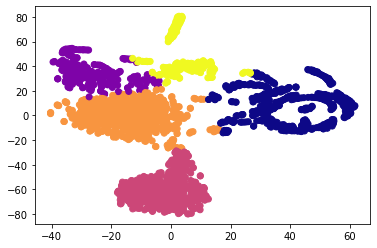

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, n_init=4, random_state=42)

kmeans_result_tsne = kmeans.fit_predict(tsne_result)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c = kmeans_result_tsne, cmap = "plasma")

/Users/hannahporta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


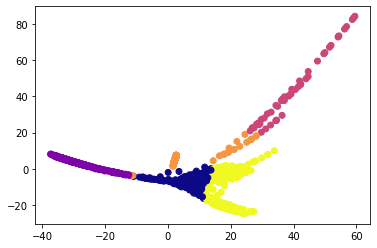

In [38]:
from sklearn.manifold import Isomap

def IsomapDR(df):
    scale = StandardScaler().fit(df)

    df_scaled = scale.transform(df)

    n_components=2

    isomap = Isomap(n_components)
    isomap_result = isomap.fit_transform(df_scaled)
    return isomap_result

isomap_result = IsomapDR(df)

kmeans_result_isomap = kmeans.fit_predict(isomap_result)

plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c = kmeans_result_isomap, cmap = "plasma")

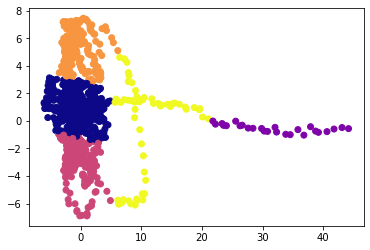

In [39]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mydata = pd.read_excel(r"./../Data/RawData.xlsx")

myscaled = StandardScaler().fit(mydata)

mydata_scaled = myscaled.transform(mydata)

mdscaled_array = np.array(mydata_scaled)

mypca = PCA(n_components=2)
pca_result = mypca.fit_transform(mdscaled_array)

kmeans_result_pca = kmeans.fit_predict(pca_result)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c = kmeans_result_pca, cmap = "plasma")

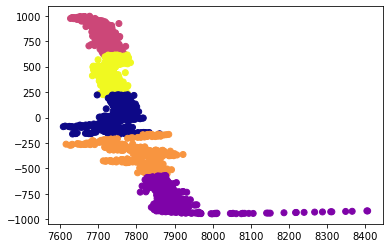

In [40]:
from sklearn.decomposition import TruncatedSVD as SVD

SVD = SVD(n_components=2)
SVD_results = SVD.fit(df)
SVD_results = SVD.transform(df)

kmeans_result_SVD = kmeans.fit_predict(SVD_results)

plt.scatter(SVD_results[:, 0], SVD_results[:, 1], c = kmeans_result_SVD, cmap = "plasma")


In [41]:
!pip install umap-learn
import umap


myscaled = StandardScaler().fit(mydata)

mydata_scaled = myscaled.transform(mydata)

mdscaled_array = np.array(mydata_scaled)

myUMAP = umap.UMAP(n_neighbors=5, random_state=42).fit(mdscaled_array)

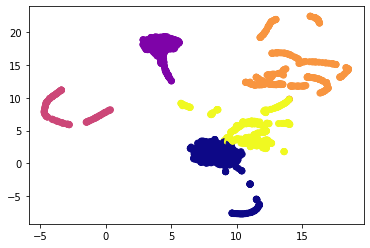

In [42]:
kmeans_result_UMAP = kmeans.fit_predict(myUMAP.embedding_)

plt.scatter(myUMAP.embedding_[:, 0], myUMAP.embedding_[:, 1], c = kmeans_result_UMAP, cmap = "plasma")

In [43]:
##Silhouette Scores

import sklearn.metrics

score_tsne = sklearn.metrics.silhouette_score(tsne_result, kmeans_result_tsne)
score_ISOMAP = sklearn.metrics.silhouette_score(isomap_result, kmeans_result_isomap)
score_PCA = sklearn.metrics.silhouette_score(pca_result, kmeans_result_pca)
score_SVD = sklearn.metrics.silhouette_score(SVD_results, kmeans_result_SVD)
score_Umap = sklearn.metrics.silhouette_score(myUMAP.embedding_, kmeans_result_UMAP)

scores = {"TSNE": [score_tsne],'ISOMAP': [score_ISOMAP], "PCA": [score_PCA],"SVD": [score_SVD],"UMAP": [score_Umap]}

table = pd.DataFrame(scores)

table

,TSNE,ISOMAP,PCA,SVD,UMAP
0,0.526387,0.723732,0.521482,0.528968,0.566663


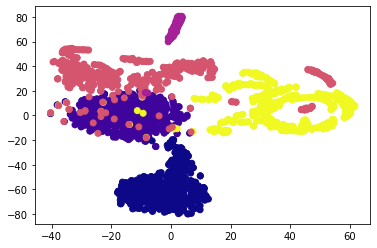

In [44]:
mylabels = pd.read_excel(r"./../Data/RawData_Label.xlsx")
mylabelsarray = np.array(mylabels)
mylabelsarray = mylabelsarray[:, -1]

#plt.scatter(myUMAP.embedding_[:, 0], myUMAP.embedding_[:, 1], c = mylabelsarray, cmap = "plasma")
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c = mylabelsarray, cmap = "plasma")
#plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c = mylabelsarray, cmap = "plasma")
#plt.scatter(pca_result[:, 0], pca_result[:, 1], c = mylabelsarray, cmap = "plasma")
#plt.scatter(SVD_results[:, 0], SVD_results[:, 1], c = mylabelsarray, cmap = "plasma")
